In [548]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import svm

In [549]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [550]:
df = df.replace('?', None)
df = df.dropna()
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<Axes: >

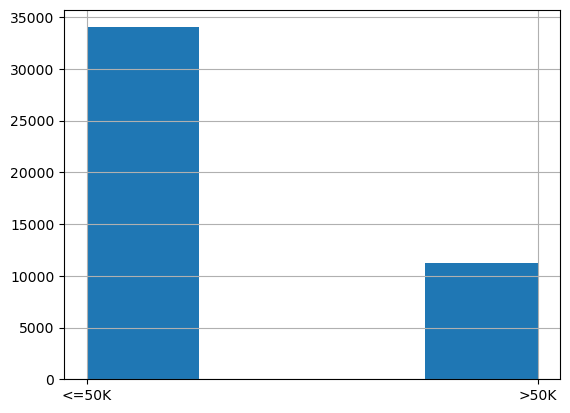

In [551]:
df['income'].hist(bins=4)

array([<Axes: ylabel='age'>], dtype=object)

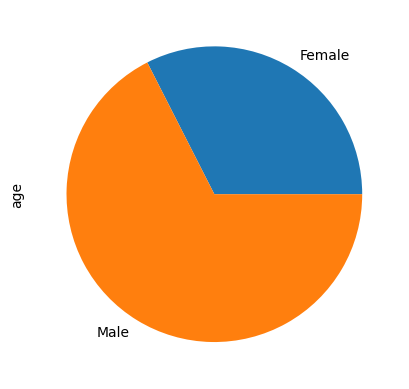

In [552]:
df.groupby(['gender']).count()['age'].plot(kind='pie', subplots=True)

In [553]:
le = LabelEncoder()
le.fit_transform(df['gender'])
df['income'] = le.fit_transform(df['income'])
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [554]:
transformer = make_column_transformer((OneHotEncoder(), ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']), remainder='passthrough', sparse_threshold=0)
transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df

,onehotencoder__workclass_Federal-gov,onehotencoder__workclass_Local-gov,onehotencoder__workclass_Private,onehotencoder__workclass_Self-emp-inc,onehotencoder__workclass_Self-emp-not-inc,onehotencoder__workclass_State-gov,onehotencoder__workclass_Without-pay,onehotencoder__education_10th,onehotencoder__education_11th,onehotencoder__education_12th,...,onehotencoder__native-country_United-States,onehotencoder__native-country_Vietnam,onehotencoder__native-country_Yugoslavia,remainder__age,remainder__fnlwgt,remainder__educational-num,remainder__capital-gain,remainder__capital-loss,remainder__hours-per-week,remainder__income
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,25.0,226802.0,7.0,0.0,0.0,40.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,38.0,89814.0,9.0,0.0,0.0,50.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,28.0,336951.0,12.0,0.0,0.0,40.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,44.0,160323.0,10.0,7688.0,0.0,40.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,34.0,198693.0,6.0,0.0,0.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,27.0,257302.0,12.0,0.0,0.0,38.0,0.0
45218,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,40.0,154374.0,9.0,0.0,0.0,40.0,1.0
45219,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,58.0,151910.0,9.0,0.0,0.0,40.0,0.0
45220,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,22.0,201490.0,9.0,0.0,0.0,20.0,0.0


In [555]:
X, y = transformed_df.loc[:, ~transformed_df.columns.isin(['remainder__occupation', 'remainder__relationship', 'remainder__native-country'])], transformed_df['remainder__income']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [556]:
#Логистическая регрессия
log = LogisticRegression().fit(X_train, y_train)
y_pred_log = log.predict(X_test)
#Метод опорных векторов
lin_clf = svm.LinearSVC().fit(X_train, y_train)
y_pred_clf = lin_clf.predict(X_test)

e:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [557]:
# смотрим разницу факта и прогноза для логистической регрессии
result_log = pd.DataFrame([np.array(y_test), y_pred_log]).T
result_log.columns = ['y_test', 'y_pred']
result_log

,y_test,y_pred
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
9040,0.0,0.0
9041,0.0,0.0
9042,0.0,0.0
9043,0.0,0.0


In [558]:
# смотрим разницу факта и прогноза для метода опорных векторов
result_clf = pd.DataFrame([np.array(y_test), y_pred_clf]).T
result_clf.columns = ['y_test', 'y_pred']
result_clf

,y_test,y_pred
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
9040,0.0,0.0
9041,0.0,0.0
9042,0.0,0.0
9043,0.0,0.0


In [559]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log.score(X_test, y_test)))
print('Accuracy of method SVM on test set: {:.2f}'.format(lin_clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80
Accuracy of method SVM on test set: 0.79


Видно, что метод опорных векторов справился хуже с предсказанием, нежели логистическая регрессия